In [13]:
%autosave 0

# import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import calendar

# libraries and settings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql.cursors

# set config seaborn
sns.set(style="whitegrid", color_codes=True)

### list of all months
months = list(calendar.month_name)

Autosave disabled


In [14]:
df = pd.read_csv('../export_20170422-111644.csv', sep='\t', parse_dates=['logtime'])

In [15]:
df.head(2)

,Unnamed: 0,msgId,hexId,logtime,coordinates,logsign,altitude,speed,track,vertical
0,0,1,3c49cc,2017-04-16 00:56:54,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xe0\x81...,undefin,37550,437,17,-576
1,1,2,3c49cc,2017-04-16 00:56:57,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xe0\x81...,undefin,37550,437,17,-576


In [16]:
fLog = df[['hexId', 'logtime']]
fLog.dtypes

hexId              object
logtime    datetime64[ns]
dtype: object

In [17]:
#fLogGrouped = fLog.groupby('logtime').count()
fLogGrouped = fLog

/opt/ds/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


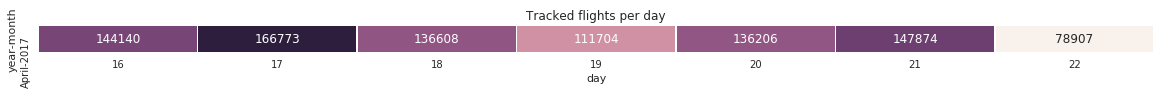

In [18]:
# Tracked flights per Day
fLogGroupedMonth = fLogGrouped.set_index('logtime').groupby(pd.TimeGrouper('D')).count().dropna().reset_index()

# 
flightLog = pd.DataFrame([])
flightLog['year'] = fLogGroupedMonth['logtime'].dt.year
flightLog['month'] = fLogGroupedMonth['logtime'].dt.month
flightLog['day'] = fLogGroupedMonth['logtime'].dt.day
flightLog['count'] = fLogGroupedMonth['hexId']
flightLog['month'] = flightLog['month'].apply(lambda x: calendar.month_name[x])
flightLog['year-month'] = flightLog['month'] + '-' + fLogGroupedMonth['logtime'].dt.year.astype(str)

flights = flightLog.pivot( "year-month", "day", "count")

# adjust size of figure and output heatmap
sns.mpl.rc("figure", figsize=(20,0.5))
sns.plt.title('Tracked flights per day')
sns.heatmap(flights, annot=True, fmt='g', linewidths=0.5, cbar=False)

/opt/ds/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


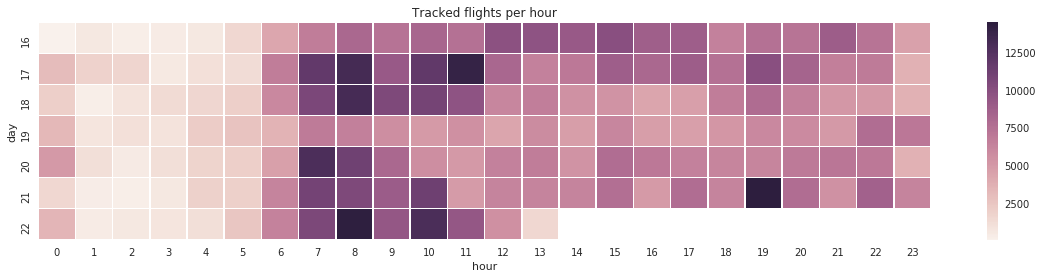

In [19]:
# Tracked flights per Hour / Day
fLogGroupedDay = fLogGrouped.set_index('logtime').groupby(pd.TimeGrouper('H')).count().dropna().reset_index()

flightLog = pd.DataFrame([])
flightLog['year'] = fLogGroupedDay['logtime'].dt.year
flightLog['month'] = fLogGroupedDay['logtime'].dt.month
flightLog['day'] = fLogGroupedDay['logtime'].dt.day
flightLog['hour'] = fLogGroupedDay['logtime'].dt.hour
flightLog['count'] = fLogGroupedDay['hexId']
flightLog['month'] = flightLog['month'].apply(lambda x: calendar.month_name[x])
flightLog['year-month'] = flightLog['month'] + '-' + fLogGroupedDay['logtime'].dt.year.astype(str)

flightsDay = flightLog.pivot( "day", "hour", "count")

# adjust size of figure and output heatmap
sns.mpl.rc("figure", figsize=(20,4))
sns.plt.title('Tracked flights per hour')
sns.heatmap(flightsDay, annot=False, fmt='g', linewidths=0.5, cbar=True)